# Channel_Extraction

This is result of my senior project!

If you want to get my model to train your data. 

please feel free to get it!

## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -U torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.6MB/s eta 0:12:02tcmalloc: large alloc 1147494400 bytes == 0x559c9b3e0000 @  0x7f9393e8e615 0x559c61bb906c 0x559c61c98eba 0x559c61bbbe8d 0x559c61cad99d 0x559c61c2ffe9 0x559c61c2ab0e 0x559c61bbd77a 0x559c61c2fe50 0x559c61c2ab0e 0x559c61bbd77a 0x559c61c2c86a 0x559c61cae7c6 0x559c61c2bee2 0x559c61cae7c6 0x559c61c2bee2 0x559c61cae7c6 0x559c61c2bee2 0x559c61cae7c6 0x559c61d30431 0x559c61c91049 0x559c61bfbc84 0x559c61bbc8e9 0x559c61c30ade 0x559c61bbd69a 0x559c61c2ba45 0x559c61c2ae0d 0x559c61bbd77a 0x559c61c2ba45 0x559c61bbd69a 0x559c61c2ba45
     |█████████████████               | 1055.7MB 1.4MB/s eta 0:11:09tcmalloc: large alloc 1434370048 bytes == 0x559cdfa36000 @  0x7f9393e8e615 0x559c61bb906c 0x559c61c98eba 0x559c61bbbe8d 0x559c61cad99d 0x559c61c2ffe9 0x559c61c2ab0e 0x559c61bbd77a 0x559c61c2fe50 0x559c61c2ab0e 0x559c61bbd77a 0x559c61c2c86a 0x559c61cae7c6 0x559c61c2bee2 0

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.8.0+cu111 True
2.11.0
11.0
GCC 7.5


### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. reorganize the dataset into COCO format.
  2. reorganize the dataset into a middle format.
  3. implement a new dataset.

Usually we recommend to use the first two methods which are usually easier than the third.

In this tutorial, we gives an example that converting the data into the format of existing datasets like COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/new_dataset.html#).

Firstly, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but has 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of dataset.

In [ ]:
# download, decompress the data
!wget https://mmdatasets.s3-ap-southeast-1.amazonaws.com/datasets.zip
!unzip datasets.zip > /dev/null

--2021-04-26 16:21:39--  https://mmdatasets.s3-ap-southeast-1.amazonaws.com/datasets.zip
Resolving mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)... 52.219.124.215
Connecting to mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)|52.219.124.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7358123 (7.0M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]   7.02M  5.10MB/s    in 1.4s    

2021-04-26 16:21:41 (5.10 MB/s) - ‘datasets.zip’ saved [7358123/7358123]



In [ ]:
%cd mmdetection

/content/mmdetection


In [ ]:
# Check the directory structure of the tiny data

# Install tree first
!apt-get -q install tree
!tree datasets

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
datasets
├── training
│   ├── image_2
│   │   ├── 001.jpg
│   │   ├── 002.jpg
│   │   ├── 003.jpg
│   │   ├── 004.jpg
│   │   ├── 005.jpg
│   │   ├── 006.jpg
│   │   ├── 007.jpg
│   │   ├── 008.jpg
│   │   ├── 009.jpg
│   │   ├── 010.jpg
│   │   ├── 011.jpg
│   │   ├── 012.jpg
│   │   ├── 013.jpg
│   │   ├── 014.jpg
│   │   ├── 015.jpg
│   │   ├── 016.jpg
│   │   ├── 017.jpg
│   │   ├── 018.jpg
│   │   ├── 019.jpg
│   │   ├── 020.jpg
│   │   ├── 021.jpg
│   │   ├── 022.jpg
│   │   ├── 023.jpg
│   │   ├── 024.jpg
│   │   ├── 025.jpg
│   │   ├── 026.jpg
│   │   ├── 027.jpg
│   │   ├── 028.jpg
│   │   ├── 029.jpg
│   │   ├── 030.jpg
│   │   ├── 031.jpg
│   │   ├── 032

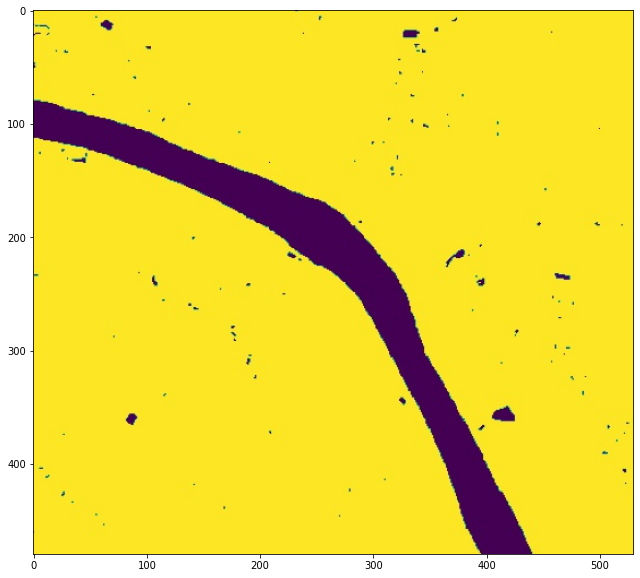

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('datasets/training/image_2/095.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the kitti annotation format into the middle format. In this tutorial we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a loot at the annotation txt file.



In [ ]:
# Check the label of a single image
!cat datasets/training/label_2/001.txt

mainchannel 0 0 0 0 106 639 351 0 0 0 0 0 0 0
oxbowlake 0 0 0 502 43 640 120 0 0 0 0 0 0 0


In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class channeldataset(CustomDataset):

    CLASSES = ('mainchannel','oxbowlake')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [ ]:
from mmcv import Config
# cfg = Config.fromfile('./configs/retinanet/retinanet_r50_caffe_fpn_mstrain_3x_coco.py')
# cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-608_273e_coco.py')
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset.

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
# Modify dataset type and path
cfg.dataset_type = 'channeldataset'
cfg.data_root = 'datasets/'

cfg.data.test.type = 'channeldataset'
cfg.data.test.data_root = 'datasets/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'channeldataset'
cfg.data.train.data_root = 'datasets/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'channeldataset'
cfg.data.val.data_root = 'datasets/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 2
# cfg.model.bbox_head.num_classes = 2
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.0025
cfg.lr_config.warmup = None
cfg.log_config.interval = 40
cfg.runner.max_epochs = 50
# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/mmdetection/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
2021-04-26 16:35:27,792 - mmdet - INFO - load model from: open-mmlab://detectron2/resnet50_caffe
2021-04-26 16:35:27,794 - mmdet - INFO - Use load_from_openmmlab loader
2021-04-26 16:35:27,916 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias

2021-04-26 16:35:31,026 - mmdet - INFO - load checkpoint from checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
2021-04-26 16:35:31,028 - mmdet - INFO - Use load_from_local loader
2021-04-26 16:35:31,194 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 12.0 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:35:46,514 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 373  | 1.000  | 0.554 |
| oxbowlake   | 28  | 1067 | 0.929  | 0.290 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.422 |
+-------------+-----+------+--------+-------+
2021-04-26 16:35:46,517 - mmdet - INFO - Epoch(val) [1][40]	AP50: 0.4220, mAP: 0.4218
2021-04-26 16:35:59,629 - mmdet - INFO - Epoch [2][40/40]	lr: 2.500e-03, eta: 0:10:26, time: 0.324, data_time: 0.064, memory: 3237, loss_rpn_cls: 0.0150, loss_rpn_bbox: 0.0223, loss_cls: 0.1712, acc: 94.1992, loss_bbox: 0.1946, loss: 0.4031


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:36:01,744 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 239  | 0.947  | 0.633 |
| oxbowlake   | 28  | 389  | 0.893  | 0.476 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.554 |
+-------------+-----+------+--------+-------+
2021-04-26 16:36:01,748 - mmdet - INFO - Epoch(val) [2][40]	AP50: 0.5540, mAP: 0.5542
2021-04-26 16:36:14,895 - mmdet - INFO - Epoch [3][40/40]	lr: 2.500e-03, eta: 0:10:12, time: 0.325, data_time: 0.064, memory: 3237, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0240, loss_cls: 0.1431, acc: 94.9316, loss_bbox: 0.1628, loss: 0.3392


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:36:16,983 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 119  | 0.947  | 0.733 |
| oxbowlake   | 28  | 214  | 0.821  | 0.580 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.656 |
+-------------+-----+------+--------+-------+
2021-04-26 16:36:16,987 - mmdet - INFO - Epoch(val) [3][40]	AP50: 0.6560, mAP: 0.6564
2021-04-26 16:36:30,097 - mmdet - INFO - Epoch [4][40/40]	lr: 2.500e-03, eta: 0:09:58, time: 0.324, data_time: 0.064, memory: 3237, loss_rpn_cls: 0.0074, loss_rpn_bbox: 0.0245, loss_cls: 0.1259, acc: 95.3564, loss_bbox: 0.1497, loss: 0.3075


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:36:32,175 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 171  | 1.000  | 0.655 |
| oxbowlake   | 28  | 259  | 0.893  | 0.601 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.628 |
+-------------+-----+------+--------+-------+
2021-04-26 16:36:32,179 - mmdet - INFO - Epoch(val) [4][40]	AP50: 0.6280, mAP: 0.6280
2021-04-26 16:36:45,309 - mmdet - INFO - Epoch [5][40/40]	lr: 2.500e-03, eta: 0:09:45, time: 0.325, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0066, loss_rpn_bbox: 0.0243, loss_cls: 0.1101, acc: 95.9839, loss_bbox: 0.1425, loss: 0.2835


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:36:47,394 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 91   | 0.895  | 0.840 |
| oxbowlake   | 28  | 124  | 0.750  | 0.541 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.691 |
+-------------+-----+------+--------+-------+
2021-04-26 16:36:47,398 - mmdet - INFO - Epoch(val) [5][40]	AP50: 0.6910, mAP: 0.6907
2021-04-26 16:37:00,636 - mmdet - INFO - Epoch [6][40/40]	lr: 2.500e-03, eta: 0:09:32, time: 0.327, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0051, loss_rpn_bbox: 0.0188, loss_cls: 0.1039, acc: 96.2866, loss_bbox: 0.1357, loss: 0.2635


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:37:02,729 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 117  | 1.000  | 0.809 |
| oxbowlake   | 28  | 178  | 0.786  | 0.515 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.662 |
+-------------+-----+------+--------+-------+
2021-04-26 16:37:02,733 - mmdet - INFO - Epoch(val) [6][40]	AP50: 0.6620, mAP: 0.6617
2021-04-26 16:37:15,809 - mmdet - INFO - Epoch [7][40/40]	lr: 2.500e-03, eta: 0:09:19, time: 0.323, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0045, loss_rpn_bbox: 0.0207, loss_cls: 0.0908, acc: 96.5332, loss_bbox: 0.1209, loss: 0.2368


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:37:17,896 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 81   | 0.895  | 0.819 |
| oxbowlake   | 28  | 135  | 0.750  | 0.615 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.717 |
+-------------+-----+------+--------+-------+
2021-04-26 16:37:17,900 - mmdet - INFO - Epoch(val) [7][40]	AP50: 0.7170, mAP: 0.7169
2021-04-26 16:37:30,912 - mmdet - INFO - Epoch [8][40/40]	lr: 2.500e-03, eta: 0:09:05, time: 0.322, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0037, loss_rpn_bbox: 0.0208, loss_cls: 0.0795, acc: 97.2803, loss_bbox: 0.1196, loss: 0.2236


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:37:33,017 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 99   | 0.947  | 0.770 |
| oxbowlake   | 28  | 133  | 0.786  | 0.581 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.675 |
+-------------+-----+------+--------+-------+
2021-04-26 16:37:33,020 - mmdet - INFO - Epoch(val) [8][40]	AP50: 0.6750, mAP: 0.6755
2021-04-26 16:37:46,062 - mmdet - INFO - Epoch [9][40/40]	lr: 2.500e-03, eta: 0:08:52, time: 0.322, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0033, loss_rpn_bbox: 0.0218, loss_cls: 0.0730, acc: 97.3389, loss_bbox: 0.1073, loss: 0.2054


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:37:48,137 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 118  | 0.895  | 0.824 |
| oxbowlake   | 28  | 115  | 0.714  | 0.566 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.695 |
+-------------+-----+------+--------+-------+
2021-04-26 16:37:48,149 - mmdet - INFO - Epoch(val) [9][40]	AP50: 0.6950, mAP: 0.6952
2021-04-26 16:38:01,262 - mmdet - INFO - Epoch [10][40/40]	lr: 2.500e-03, eta: 0:08:39, time: 0.324, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0179, loss_cls: 0.0656, acc: 97.7124, loss_bbox: 0.1124, loss: 0.1989


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.9 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:38:03,330 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 163  | 0.947  | 0.850 |
| oxbowlake   | 28  | 135  | 0.714  | 0.523 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.687 |
+-------------+-----+------+--------+-------+
2021-04-26 16:38:03,334 - mmdet - INFO - Epoch(val) [10][40]	AP50: 0.6870, mAP: 0.6865
2021-04-26 16:38:16,413 - mmdet - INFO - Epoch [11][40/40]	lr: 2.500e-03, eta: 0:08:25, time: 0.323, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0159, loss_cls: 0.0579, acc: 97.9492, loss_bbox: 0.0922, loss: 0.1690


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:38:18,496 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 91   | 0.895  | 0.761 |
| oxbowlake   | 28  | 143  | 0.821  | 0.608 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.684 |
+-------------+-----+------+--------+-------+
2021-04-26 16:38:18,499 - mmdet - INFO - Epoch(val) [11][40]	AP50: 0.6840, mAP: 0.6844
2021-04-26 16:38:31,613 - mmdet - INFO - Epoch [12][40/40]	lr: 2.500e-03, eta: 0:08:12, time: 0.324, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0034, loss_rpn_bbox: 0.0217, loss_cls: 0.0585, acc: 97.9761, loss_bbox: 0.0975, loss: 0.1812


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:38:33,725 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 97   | 0.947  | 0.783 |
| oxbowlake   | 28  | 100  | 0.786  | 0.631 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.707 |
+-------------+-----+------+--------+-------+
2021-04-26 16:38:33,729 - mmdet - INFO - Epoch(val) [12][40]	AP50: 0.7070, mAP: 0.7069
2021-04-26 16:38:46,893 - mmdet - INFO - Epoch [13][40/40]	lr: 2.500e-03, eta: 0:08:00, time: 0.325, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0175, loss_cls: 0.0513, acc: 98.1567, loss_bbox: 0.0968, loss: 0.1677


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.9 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:38:48,951 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 95   | 0.842  | 0.725 |
| oxbowlake   | 28  | 125  | 0.857  | 0.640 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.683 |
+-------------+-----+------+--------+-------+
2021-04-26 16:38:48,954 - mmdet - INFO - Epoch(val) [13][40]	AP50: 0.6830, mAP: 0.6825
2021-04-26 16:39:02,036 - mmdet - INFO - Epoch [14][40/40]	lr: 2.500e-03, eta: 0:07:47, time: 0.324, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0173, loss_cls: 0.0471, acc: 98.2935, loss_bbox: 0.0906, loss: 0.1573


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:39:04,108 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 128  | 0.895  | 0.732 |
| oxbowlake   | 28  | 109  | 0.643  | 0.554 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.643 |
+-------------+-----+------+--------+-------+
2021-04-26 16:39:04,112 - mmdet - INFO - Epoch(val) [14][40]	AP50: 0.6430, mAP: 0.6429
2021-04-26 16:39:17,227 - mmdet - INFO - Epoch [15][40/40]	lr: 2.500e-03, eta: 0:07:34, time: 0.324, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0186, loss_cls: 0.0453, acc: 98.4448, loss_bbox: 0.0858, loss: 0.1519


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.9 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:39:19,281 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 105  | 0.947  | 0.847 |
| oxbowlake   | 28  | 99   | 0.750  | 0.629 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.738 |
+-------------+-----+------+--------+-------+
2021-04-26 16:39:19,285 - mmdet - INFO - Epoch(val) [15][40]	AP50: 0.7380, mAP: 0.7381
2021-04-26 16:39:32,272 - mmdet - INFO - Epoch [16][40/40]	lr: 2.500e-03, eta: 0:07:20, time: 0.321, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0158, loss_cls: 0.0431, acc: 98.4326, loss_bbox: 0.0839, loss: 0.1443


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:39:34,373 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 123  | 1.000  | 0.869 |
| oxbowlake   | 28  | 114  | 0.714  | 0.612 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.741 |
+-------------+-----+------+--------+-------+
2021-04-26 16:39:34,376 - mmdet - INFO - Epoch(val) [16][40]	AP50: 0.7410, mAP: 0.7406
2021-04-26 16:39:47,527 - mmdet - INFO - Epoch [17][40/40]	lr: 2.500e-03, eta: 0:07:07, time: 0.325, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0164, loss_cls: 0.0382, acc: 98.6206, loss_bbox: 0.0811, loss: 0.1380


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:39:49,647 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 77   | 0.947  | 0.878 |
| oxbowlake   | 28  | 88   | 0.821  | 0.609 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.744 |
+-------------+-----+------+--------+-------+
2021-04-26 16:39:49,651 - mmdet - INFO - Epoch(val) [17][40]	AP50: 0.7440, mAP: 0.7438
2021-04-26 16:40:02,636 - mmdet - INFO - Epoch [18][40/40]	lr: 2.500e-03, eta: 0:06:54, time: 0.321, data_time: 0.063, memory: 3393, loss_rpn_cls: 0.0017, loss_rpn_bbox: 0.0138, loss_cls: 0.0368, acc: 98.5498, loss_bbox: 0.0724, loss: 0.1246


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:40:04,725 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 81   | 0.947  | 0.874 |
| oxbowlake   | 28  | 87   | 0.786  | 0.597 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.735 |
+-------------+-----+------+--------+-------+
2021-04-26 16:40:04,728 - mmdet - INFO - Epoch(val) [18][40]	AP50: 0.7350, mAP: 0.7354
2021-04-26 16:40:17,746 - mmdet - INFO - Epoch [19][40/40]	lr: 2.500e-03, eta: 0:06:41, time: 0.321, data_time: 0.064, memory: 3393, loss_rpn_cls: 0.0012, loss_rpn_bbox: 0.0167, loss_cls: 0.0345, acc: 98.8135, loss_bbox: 0.0724, loss: 0.1248


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:40:19,847 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 91   | 0.947  | 0.867 |
| oxbowlake   | 28  | 107  | 0.821  | 0.618 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.742 |
+-------------+-----+------+--------+-------+
2021-04-26 16:40:19,850 - mmdet - INFO - Epoch(val) [19][40]	AP50: 0.7420, mAP: 0.7425
2021-04-26 16:40:32,956 - mmdet - INFO - Epoch [20][40/40]	lr: 2.500e-03, eta: 0:06:28, time: 0.324, data_time: 0.065, memory: 3394, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0144, loss_cls: 0.0347, acc: 98.7793, loss_bbox: 0.0725, loss: 0.1231
2021-04-26 16:40:33,029 - mmdet - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:40:36,118 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 131  | 0.947  | 0.833 |
| oxbowlake   | 28  | 132  | 0.750  | 0.640 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.736 |
+-------------+-----+------+--------+-------+
2021-04-26 16:40:36,122 - mmdet - INFO - Epoch(val) [20][40]	AP50: 0.7360, mAP: 0.7364
2021-04-26 16:40:49,221 - mmdet - INFO - Epoch [21][40/40]	lr: 2.500e-03, eta: 0:06:15, time: 0.324, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0157, loss_cls: 0.0365, acc: 98.6597, loss_bbox: 0.0735, loss: 0.1274


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.9 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:40:51,308 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 92   | 0.947  | 0.767 |
| oxbowlake   | 28  | 101  | 0.786  | 0.614 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.690 |
+-------------+-----+------+--------+-------+
2021-04-26 16:40:51,312 - mmdet - INFO - Epoch(val) [21][40]	AP50: 0.6900, mAP: 0.6904
2021-04-26 16:41:04,361 - mmdet - INFO - Epoch [22][40/40]	lr: 2.500e-03, eta: 0:06:02, time: 0.323, data_time: 0.065, memory: 3394, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0150, loss_cls: 0.0360, acc: 98.6304, loss_bbox: 0.0682, loss: 0.1207


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:41:06,484 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 106  | 0.947  | 0.798 |
| oxbowlake   | 28  | 92   | 0.786  | 0.605 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.702 |
+-------------+-----+------+--------+-------+
2021-04-26 16:41:06,488 - mmdet - INFO - Epoch(val) [22][40]	AP50: 0.7020, mAP: 0.7016
2021-04-26 16:41:19,538 - mmdet - INFO - Epoch [23][40/40]	lr: 2.500e-03, eta: 0:05:49, time: 0.323, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0163, loss_cls: 0.0334, acc: 98.7061, loss_bbox: 0.0710, loss: 0.1222


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:41:21,623 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 111  | 0.947  | 0.817 |
| oxbowlake   | 28  | 117  | 0.821  | 0.649 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.733 |
+-------------+-----+------+--------+-------+
2021-04-26 16:41:21,626 - mmdet - INFO - Epoch(val) [23][40]	AP50: 0.7330, mAP: 0.7329
2021-04-26 16:41:34,718 - mmdet - INFO - Epoch [24][40/40]	lr: 2.500e-03, eta: 0:05:36, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0018, loss_rpn_bbox: 0.0163, loss_cls: 0.0347, acc: 98.7646, loss_bbox: 0.0657, loss: 0.1186


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:41:36,819 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 103  | 0.947  | 0.867 |
| oxbowlake   | 28  | 119  | 0.857  | 0.697 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.782 |
+-------------+-----+------+--------+-------+
2021-04-26 16:41:36,825 - mmdet - INFO - Epoch(val) [24][40]	AP50: 0.7820, mAP: 0.7817
2021-04-26 16:41:49,889 - mmdet - INFO - Epoch [25][40/40]	lr: 2.500e-03, eta: 0:05:23, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0017, loss_rpn_bbox: 0.0144, loss_cls: 0.0307, acc: 98.8770, loss_bbox: 0.0659, loss: 0.1126


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:41:52,007 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 143  | 0.947  | 0.890 |
| oxbowlake   | 28  | 135  | 0.714  | 0.610 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.750 |
+-------------+-----+------+--------+-------+
2021-04-26 16:41:52,010 - mmdet - INFO - Epoch(val) [25][40]	AP50: 0.7500, mAP: 0.7504
2021-04-26 16:42:05,051 - mmdet - INFO - Epoch [26][40/40]	lr: 2.500e-03, eta: 0:05:10, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0144, loss_cls: 0.0302, acc: 98.8965, loss_bbox: 0.0655, loss: 0.1114


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:42:07,179 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 100  | 0.947  | 0.889 |
| oxbowlake   | 28  | 108  | 0.821  | 0.668 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.779 |
+-------------+-----+------+--------+-------+
2021-04-26 16:42:07,184 - mmdet - INFO - Epoch(val) [26][40]	AP50: 0.7790, mAP: 0.7787
2021-04-26 16:42:20,195 - mmdet - INFO - Epoch [27][40/40]	lr: 2.500e-03, eta: 0:04:57, time: 0.321, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0159, loss_cls: 0.0303, acc: 98.9233, loss_bbox: 0.0708, loss: 0.1183


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:42:22,316 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 101  | 0.947  | 0.870 |
| oxbowlake   | 28  | 96   | 0.750  | 0.638 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.754 |
+-------------+-----+------+--------+-------+
2021-04-26 16:42:22,320 - mmdet - INFO - Epoch(val) [27][40]	AP50: 0.7540, mAP: 0.7542
2021-04-26 16:42:35,494 - mmdet - INFO - Epoch [28][40/40]	lr: 2.500e-03, eta: 0:04:44, time: 0.325, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0154, loss_cls: 0.0299, acc: 98.9771, loss_bbox: 0.0597, loss: 0.1064


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:42:37,600 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 99   | 0.895  | 0.807 |
| oxbowlake   | 28  | 120  | 0.786  | 0.650 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.728 |
+-------------+-----+------+--------+-------+
2021-04-26 16:42:37,604 - mmdet - INFO - Epoch(val) [28][40]	AP50: 0.7280, mAP: 0.7282
2021-04-26 16:42:50,595 - mmdet - INFO - Epoch [29][40/40]	lr: 2.500e-04, eta: 0:04:31, time: 0.321, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0122, loss_cls: 0.0286, acc: 98.9795, loss_bbox: 0.0544, loss: 0.0968


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:42:52,667 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 113  | 0.947  | 0.837 |
| oxbowlake   | 28  | 112  | 0.750  | 0.645 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.741 |
+-------------+-----+------+--------+-------+
2021-04-26 16:42:52,671 - mmdet - INFO - Epoch(val) [29][40]	AP50: 0.7410, mAP: 0.7411
2021-04-26 16:43:05,721 - mmdet - INFO - Epoch [30][40/40]	lr: 2.500e-04, eta: 0:04:18, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0017, loss_rpn_bbox: 0.0127, loss_cls: 0.0275, acc: 99.0210, loss_bbox: 0.0511, loss: 0.0931


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:43:07,846 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 123  | 0.947  | 0.868 |
| oxbowlake   | 28  | 122  | 0.786  | 0.651 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.760 |
+-------------+-----+------+--------+-------+
2021-04-26 16:43:07,850 - mmdet - INFO - Epoch(val) [30][40]	AP50: 0.7600, mAP: 0.7595
2021-04-26 16:43:20,966 - mmdet - INFO - Epoch [31][40/40]	lr: 2.500e-04, eta: 0:04:05, time: 0.325, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0113, loss_cls: 0.0279, acc: 99.1138, loss_bbox: 0.0469, loss: 0.0868


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:43:23,069 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 114  | 0.947  | 0.832 |
| oxbowlake   | 28  | 118  | 0.821  | 0.674 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.753 |
+-------------+-----+------+--------+-------+
2021-04-26 16:43:23,073 - mmdet - INFO - Epoch(val) [31][40]	AP50: 0.7530, mAP: 0.7529
2021-04-26 16:43:36,134 - mmdet - INFO - Epoch [32][40/40]	lr: 2.500e-04, eta: 0:03:52, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0119, loss_cls: 0.0252, acc: 99.1260, loss_bbox: 0.0478, loss: 0.0863


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:43:38,273 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 118  | 0.947  | 0.816 |
| oxbowlake   | 28  | 120  | 0.821  | 0.670 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.743 |
+-------------+-----+------+--------+-------+
2021-04-26 16:43:38,276 - mmdet - INFO - Epoch(val) [32][40]	AP50: 0.7430, mAP: 0.7430
2021-04-26 16:43:51,348 - mmdet - INFO - Epoch [33][40/40]	lr: 2.500e-04, eta: 0:03:39, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0139, loss_cls: 0.0279, acc: 99.0503, loss_bbox: 0.0470, loss: 0.0901


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:43:53,466 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 120  | 0.895  | 0.818 |
| oxbowlake   | 28  | 123  | 0.786  | 0.659 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.739 |
+-------------+-----+------+--------+-------+
2021-04-26 16:43:53,469 - mmdet - INFO - Epoch(val) [33][40]	AP50: 0.7390, mAP: 0.7386
2021-04-26 16:44:06,499 - mmdet - INFO - Epoch [34][40/40]	lr: 2.500e-04, eta: 0:03:26, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0122, loss_cls: 0.0246, acc: 99.1626, loss_bbox: 0.0453, loss: 0.0832


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:44:08,608 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 130  | 0.947  | 0.868 |
| oxbowlake   | 28  | 133  | 0.786  | 0.654 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.761 |
+-------------+-----+------+--------+-------+
2021-04-26 16:44:08,611 - mmdet - INFO - Epoch(val) [34][40]	AP50: 0.7610, mAP: 0.7610
2021-04-26 16:44:21,722 - mmdet - INFO - Epoch [35][40/40]	lr: 2.500e-05, eta: 0:03:14, time: 0.324, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0130, loss_cls: 0.0245, acc: 99.1919, loss_bbox: 0.0453, loss: 0.0838


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:44:23,814 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 132  | 0.947  | 0.832 |
| oxbowlake   | 28  | 134  | 0.786  | 0.654 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.743 |
+-------------+-----+------+--------+-------+
2021-04-26 16:44:23,818 - mmdet - INFO - Epoch(val) [35][40]	AP50: 0.7430, mAP: 0.7432
2021-04-26 16:44:36,858 - mmdet - INFO - Epoch [36][40/40]	lr: 2.500e-05, eta: 0:03:01, time: 0.322, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0111, loss_cls: 0.0272, acc: 99.1528, loss_bbox: 0.0454, loss: 0.0853


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:44:38,968 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 134  | 0.947  | 0.833 |
| oxbowlake   | 28  | 135  | 0.786  | 0.657 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.745 |
+-------------+-----+------+--------+-------+
2021-04-26 16:44:38,973 - mmdet - INFO - Epoch(val) [36][40]	AP50: 0.7450, mAP: 0.7449
2021-04-26 16:44:52,018 - mmdet - INFO - Epoch [37][40/40]	lr: 2.500e-05, eta: 0:02:48, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0010, loss_rpn_bbox: 0.0120, loss_cls: 0.0252, acc: 99.1602, loss_bbox: 0.0439, loss: 0.0822


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.3 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:44:54,177 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 131  | 0.947  | 0.834 |
| oxbowlake   | 28  | 133  | 0.786  | 0.654 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.744 |
+-------------+-----+------+--------+-------+
2021-04-26 16:44:54,180 - mmdet - INFO - Epoch(val) [37][40]	AP50: 0.7440, mAP: 0.7443
2021-04-26 16:45:07,233 - mmdet - INFO - Epoch [38][40/40]	lr: 2.500e-05, eta: 0:02:35, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0107, loss_cls: 0.0264, acc: 99.1504, loss_bbox: 0.0484, loss: 0.0865


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:45:09,308 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 132  | 0.947  | 0.825 |
| oxbowlake   | 28  | 133  | 0.786  | 0.656 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.740 |
+-------------+-----+------+--------+-------+
2021-04-26 16:45:09,312 - mmdet - INFO - Epoch(val) [38][40]	AP50: 0.7400, mAP: 0.7401
2021-04-26 16:45:22,405 - mmdet - INFO - Epoch [39][40/40]	lr: 2.500e-05, eta: 0:02:22, time: 0.323, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0123, loss_cls: 0.0259, acc: 99.1919, loss_bbox: 0.0441, loss: 0.0833


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.3 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:45:24,549 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 135  | 0.947  | 0.828 |
| oxbowlake   | 28  | 136  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.743 |
+-------------+-----+------+--------+-------+
2021-04-26 16:45:24,554 - mmdet - INFO - Epoch(val) [39][40]	AP50: 0.7430, mAP: 0.7430
2021-04-26 16:45:37,564 - mmdet - INFO - Epoch [40][40/40]	lr: 2.500e-05, eta: 0:02:09, time: 0.322, data_time: 0.065, memory: 3394, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0120, loss_cls: 0.0247, acc: 99.1919, loss_bbox: 0.0455, loss: 0.0836
2021-04-26 16:45:37,649 - mmdet - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.4 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:45:40,583 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 135  | 0.947  | 0.836 |
| oxbowlake   | 28  | 138  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.747 |
+-------------+-----+------+--------+-------+
2021-04-26 16:45:40,586 - mmdet - INFO - Epoch(val) [40][40]	AP50: 0.7470, mAP: 0.7472
2021-04-26 16:45:53,631 - mmdet - INFO - Epoch [41][40/40]	lr: 2.500e-05, eta: 0:01:56, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0107, loss_cls: 0.0259, acc: 99.1431, loss_bbox: 0.0443, loss: 0.0822


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.4 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:45:55,775 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 134  | 0.947  | 0.837 |
| oxbowlake   | 28  | 136  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.748 |
+-------------+-----+------+--------+-------+
2021-04-26 16:45:55,779 - mmdet - INFO - Epoch(val) [41][40]	AP50: 0.7480, mAP: 0.7476
2021-04-26 16:46:08,711 - mmdet - INFO - Epoch [42][40/40]	lr: 2.500e-05, eta: 0:01:43, time: 0.319, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0010, loss_rpn_bbox: 0.0109, loss_cls: 0.0256, acc: 99.1333, loss_bbox: 0.0452, loss: 0.0827


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:46:10,838 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 134  | 0.947  | 0.837 |
| oxbowlake   | 28  | 138  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.748 |
+-------------+-----+------+--------+-------+
2021-04-26 16:46:10,841 - mmdet - INFO - Epoch(val) [42][40]	AP50: 0.7480, mAP: 0.7476
2021-04-26 16:46:23,888 - mmdet - INFO - Epoch [43][40/40]	lr: 2.500e-05, eta: 0:01:30, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0010, loss_rpn_bbox: 0.0114, loss_cls: 0.0255, acc: 99.1797, loss_bbox: 0.0452, loss: 0.0830


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:46:26,032 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.834 |
| oxbowlake   | 28  | 140  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.746 |
+-------------+-----+------+--------+-------+
2021-04-26 16:46:26,036 - mmdet - INFO - Epoch(val) [43][40]	AP50: 0.7460, mAP: 0.7460
2021-04-26 16:46:39,060 - mmdet - INFO - Epoch [44][40/40]	lr: 2.500e-05, eta: 0:01:17, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0106, loss_cls: 0.0245, acc: 99.2041, loss_bbox: 0.0436, loss: 0.0793


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:46:41,150 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 51   | 0.947  | 0.835 |
| oxbowlake   | 28  | 138  | 0.786  | 0.658 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.746 |
+-------------+-----+------+--------+-------+
2021-04-26 16:46:41,153 - mmdet - INFO - Epoch(val) [44][40]	AP50: 0.7460, mAP: 0.7464
2021-04-26 16:46:54,223 - mmdet - INFO - Epoch [45][40/40]	lr: 2.500e-05, eta: 0:01:04, time: 0.323, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0102, loss_cls: 0.0248, acc: 99.2212, loss_bbox: 0.0445, loss: 0.0803


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.5 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:46:56,348 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.837 |
| oxbowlake   | 28  | 139  | 0.786  | 0.659 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.748 |
+-------------+-----+------+--------+-------+
2021-04-26 16:46:56,352 - mmdet - INFO - Epoch(val) [45][40]	AP50: 0.7480, mAP: 0.7479
2021-04-26 16:47:09,482 - mmdet - INFO - Epoch [46][40/40]	lr: 2.500e-05, eta: 0:00:51, time: 0.324, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0012, loss_rpn_bbox: 0.0116, loss_cls: 0.0266, acc: 99.0649, loss_bbox: 0.0437, loss: 0.0831


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:47:11,582 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 49   | 0.947  | 0.837 |
| oxbowlake   | 28  | 141  | 0.786  | 0.662 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.749 |
+-------------+-----+------+--------+-------+
2021-04-26 16:47:11,585 - mmdet - INFO - Epoch(val) [46][40]	AP50: 0.7490, mAP: 0.7494
2021-04-26 16:47:24,772 - mmdet - INFO - Epoch [47][40/40]	lr: 2.500e-05, eta: 0:00:38, time: 0.326, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0111, loss_cls: 0.0252, acc: 99.1528, loss_bbox: 0.0431, loss: 0.0808


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:47:26,901 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.837 |
| oxbowlake   | 28  | 141  | 0.786  | 0.662 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.749 |
+-------------+-----+------+--------+-------+
2021-04-26 16:47:26,909 - mmdet - INFO - Epoch(val) [47][40]	AP50: 0.7490, mAP: 0.7494
2021-04-26 16:47:39,938 - mmdet - INFO - Epoch [48][40/40]	lr: 2.500e-05, eta: 0:00:25, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0122, loss_cls: 0.0257, acc: 99.1479, loss_bbox: 0.0433, loss: 0.0823


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.6 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:47:42,055 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.837 |
| oxbowlake   | 28  | 141  | 0.786  | 0.662 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.749 |
+-------------+-----+------+--------+-------+
2021-04-26 16:47:42,059 - mmdet - INFO - Epoch(val) [48][40]	AP50: 0.7490, mAP: 0.7494
2021-04-26 16:47:55,086 - mmdet - INFO - Epoch [49][40/40]	lr: 2.500e-05, eta: 0:00:12, time: 0.322, data_time: 0.064, memory: 3394, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0130, loss_cls: 0.0246, acc: 99.1968, loss_bbox: 0.0428, loss: 0.0811


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.7 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:47:57,187 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.837 |
| oxbowlake   | 28  | 143  | 0.786  | 0.662 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.749 |
+-------------+-----+------+--------+-------+
2021-04-26 16:47:57,190 - mmdet - INFO - Epoch(val) [49][40]	AP50: 0.7490, mAP: 0.7494
2021-04-26 16:48:10,317 - mmdet - INFO - Epoch [50][40/40]	lr: 2.500e-05, eta: 0:00:00, time: 0.325, data_time: 0.063, memory: 3394, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0119, loss_cls: 0.0264, acc: 99.1113, loss_bbox: 0.0431, loss: 0.0823
2021-04-26 16:48:10,401 - mmdet - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.4 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-04-26 16:48:13,381 - mmdet - INFO - 
+-------------+-----+------+--------+-------+
| class       | gts | dets | recall | ap    |
+-------------+-----+------+--------+-------+
| mainchannel | 19  | 50   | 0.947  | 0.837 |
| oxbowlake   | 28  | 142  | 0.786  | 0.661 |
+-------------+-----+------+--------+-------+
| mAP         |     |      |        | 0.749 |
+-------------+-----+------+--------+-------+
2021-04-26 16:48:13,385 - mmdet - INFO - Epoch(val) [50][40]	AP50: 0.7490, mAP: 0.7489


### Understand the log
From the log, we can have a basic understanding the training process and know how well the detector is trained.

Firstly, the ResNet-50 backbone pre-trained on ImageNet is loaded, this is a common practice since training from scratch is more cost. The log shows that all the weights of the ResNet-50 backbone are loaded except the `conv1.bias`, which has been merged into `conv.weights`.

Second, since the dataset we are using is small, we loaded a Mask R-CNN model and finetune it for detection. Because the detector we actually using is Faster R-CNN, the weights in mask branch, e.g. `roi_head.mask_head`, are `unexpected key in source state_dict` and not loaded.
The original Mask R-CNN is trained on COCO dataset which contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layer of the pre-trained Mask R-CNN for classification has different weight shape and is not used.

Third, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 54.1 mAP on the val dataset,
 not bad!

## Test the trained detector

After finetuning the detector, let's visualize the prediction results!

In [ ]:
!python tools/model_converters/publish_model.py /content/mmdetection/tutorial_exps/latest.pth faster_rcnn_r50_fpn_3x_v9.pth

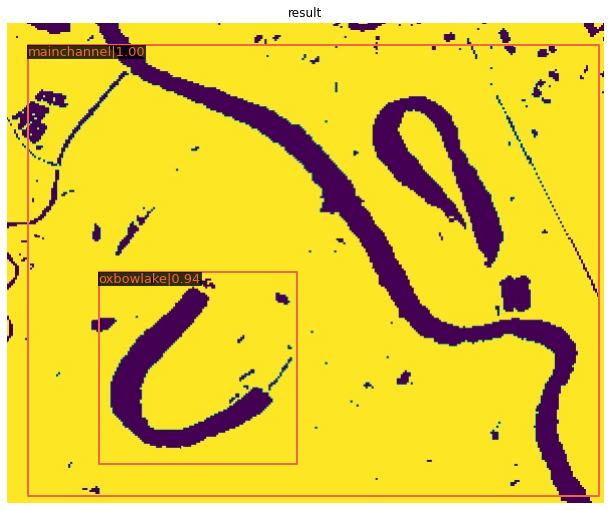

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import mmcv

img = mmcv.imread('/content/drive/MyDrive/testsetv2/test009.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.9)

### Download all training result

KeyboardInterrupt: ignored

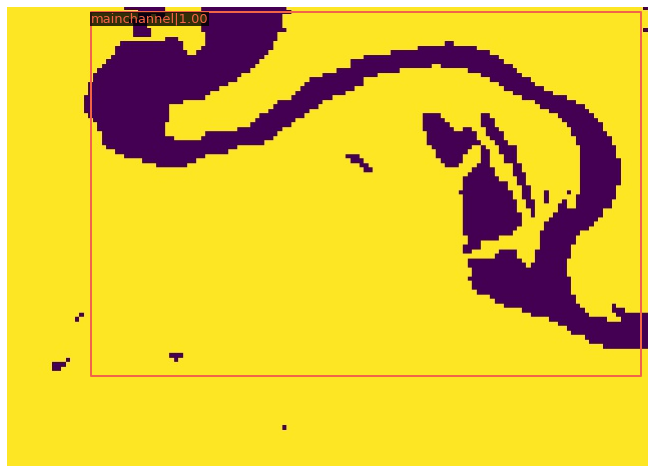

In [ ]:
import os

# !mkdir output

directory = r'datasets/training/image_2/'
# directory = r'testset/'
for filename in os.listdir(directory):

  img = mmcv.imread(directory+filename)

  model.cfg = cfg
  result = inference_detector(model, img)
  model.show_result(img, result, out_file='output/%s'%filename, score_thr= 0.9)
  # model.show_result(img)
  


###Plot loss

In [ ]:
!python /content/mmdetection/tools/analysis_tools/analyze_logs.py plot_curve /content/mmdetection/tutorial_exps/Fasterrcnn_resnet50_40epch.log.json --keys loss_cls loss_bbox --legend loss_cls loss_bbox --out losses_lr0.0025_40epch.pdf

### Export bbox coordinate to csv

In [ ]:
import pandas as pd

In [ ]:
# initialize datafram
df = pd.DataFrame({"pic":[],"class":[],"num":[],"ymax":[],"ymin":[],"xmax":[],"xmin":[],"prob":[]})
# df_oxbow = pd.DataFrame({"num":[],"ymax":[],"ymin":[],"xmax":[],"xmin":[],"prob":[]})
df

,pic,class,num,ymax,ymin,xmax,xmin,prob


In [ ]:
import os



# directory = r'datasets/training/image_2/'
directory = r'/content/drive/MyDrive/testsetv2/'
for filename in os.listdir(directory):

  img = mmcv.imread(directory+filename)

  model.cfg = cfg
  result = inference_detector(model, img)
  # print(result)
  # print("*****************************")
  i=1
  for r in result[0]:      # main_channel
    if r[4] > 0.9:
  #     # print(r)
  #     # print("****************************")
  #   # for i in r:
      r = np.reshape(r,[1,5])
      listofdata = np.array([filename,"main_channel",i])
      listofdata = np.append(listofdata,r)
      listofdata = np.reshape(listofdata,[1,8])
      df_test = pd.DataFrame(listofdata, columns =df.columns)
      df = df.append(df_test, ignore_index=True)   
    i+=1
  i=1    
  for r in result[1]:    # oxbow_lake
    if r[4] > 0.9:
      r = np.reshape(r,[1,5])
      listofdata = np.array([filename,"oxbow_lake",i])
      listofdata = np.append(listofdata,r)
      listofdata = np.reshape(listofdata,[1,8])
      df_test = pd.DataFrame(listofdata, columns =df.columns)
      df = df.append(df_test, ignore_index=True)   
    i+=1  


In [ ]:
df

,pic,class,num,ymax,ymin,xmax,xmin,prob
0,test006.jpg,main_channel,1,29.684313,27.736341,513.8037,445.7727,0.9874171
1,test006.jpg,oxbow_lake,1,54.044155,239.389,162.6342,327.94977,0.9965564
2,test006.jpg,oxbow_lake,2,150.76074,262.5047,406.81055,471.5538,0.9910228
3,test006.jpg,oxbow_lake,3,262.46967,110.33099,425.45572,189.08739,0.9873438
4,test006.jpg,oxbow_lake,4,66.376785,176.27098,264.3543,275.29352,0.96956795
5,test008.jpg,main_channel,1,169.42094,0.0,468.35333,366.10944,0.9963631
6,test008.jpg,oxbow_lake,1,38.31629,16.784603,137.9286,107.71525,0.9914051
7,test010.jpg,main_channel,1,373.12766,156.96251,593.64496,340.24942,0.99608237
8,test010.jpg,main_channel,2,42.818127,61.496838,611.70734,343.0,0.92267656
9,test010.jpg,oxbow_lake,1,453.01187,47.335033,535.2628,170.74452,0.9976682


In [ ]:
df.to_csv('test_lr0.0025_thr0.9_v9.csv', index=False)

In [ ]:
!rm -rf /content/mmdetection/output

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# !mkdir imgwithaxis
# directory = r'datasets/training/image_2/'
# for filename in os.listdir(directory):

#   image=mpimg.imread(directory+filename)
#   imgplot = plt.imshow(image)
#   plt.savefig("/content/mmdetection/imgwithaxis/%s"%filename,pad = 0, format="jpg")




In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = '/content/mmdetection/faster_rcnn_r50_fpn_3x_v9-d5c7015e.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

In [ ]:
img = '/content/test006.jpg'
result = inference_detector(model, img)

In [ ]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
